In [2]:
FILE=2                # There are 48 files.
CHANNEL=0             # There are 2 channels
SAMPLE_START=114000   # Start of the sample in the file.
SAMPLE_SIZE=4000      # Number of readings (360 per second).

In [3]:
import sys
sys.path.append("/home/carlitos/Documents/Projects/ecg_classification")

In [4]:
import wfdb as wf
import numpy as np
from src.datasets import mitdb as dm
from matplotlib import pyplot as plt

## Load File

In [5]:
def load_ecg_file(file_path, channel=0, sample_start=0, sample_size=4000):
    """
    Load ECG data from a file and extract a specified segment.

    Parameters:
    - file_path (str): Path to the ECG data file.
    - channel (int): Channel index to extract data from.
    - sample_start (int): Starting index of the segment.
    - sample_size (int): Number of readings in the segment.

    Returns:
    - times (numpy.ndarray): Time values for the segment.
    - ecg_data (numpy.ndarray): Extracted ECG data for the specified segment.
    - annotimes (numpy.ndarray): Time values for annotations.
    - annotypes (numpy.ndarray): Annotation types corresponding to annotimes.
    """
    record = wf.rdsamp(file_path)
    annotation = wf.rdann(file_path, 'atr')

    # Extract data for the specified segment.
    sample_end = sample_start + sample_size
    ecg_data = record[0][sample_start:sample_end, channel]

    # Time values for the segment.
    times = (np.arange(sample_size, dtype='float') + sample_start) / record[1].get('fs')

    # Extract annotations within the segment.
    where = np.logical_and(annotation.sample >= sample_start, annotation.sample < sample_end)
    annots = annotation.sample[where] - sample_start
    annotypes = np.array(annotation.symbol)
    annotypes = annotypes[where]

    # Time values for annotations.
    annotimes = times[annots]

    return times, ecg_data, annotimes, annotypes

## Plot

In [6]:
def plot_ecg_data(times, ecg_data, annotimes, annotypes, save_path=None):
    """
    Plot ECG data and annotations.

    Parameters:
    - times (numpy.ndarray): Time values for the ECG data.
    - ecg_data (numpy.ndarray): ECG data to be plotted.
    - annotimes (numpy.ndarray): Time values for annotations.
    - annotypes (numpy.ndarray): Annotation types corresponding to annotimes.
    - save_path (str): Path to save the figure. If None, the figure is not saved.
    """
    plt.figure(figsize=(20, 10))
    plt.plot(times, ecg_data)

    # Plot annotations.
    plt.plot(annotimes, np.ones_like(annotimes) * ecg_data.max() * 1.4, 'ro')

    # Annotation codes.
    for idx, annot in enumerate(annotimes):
        plt.annotate(annotypes[idx], xy=(annot, ecg_data.max() * 1.1))

    plt.xlabel('Offset')
    plt.ylabel('ECG Data')

    # Save the figure if save_path is provided.
    if save_path:
        plt.savefig(save_path)
        print(f"Figure saved at {save_path}")
    else:
        plt.show()

Total files:  48
Loading file: ../data/raw/mitdb/102
Figure saved at ../reports/figures/102_ecg_plot.png


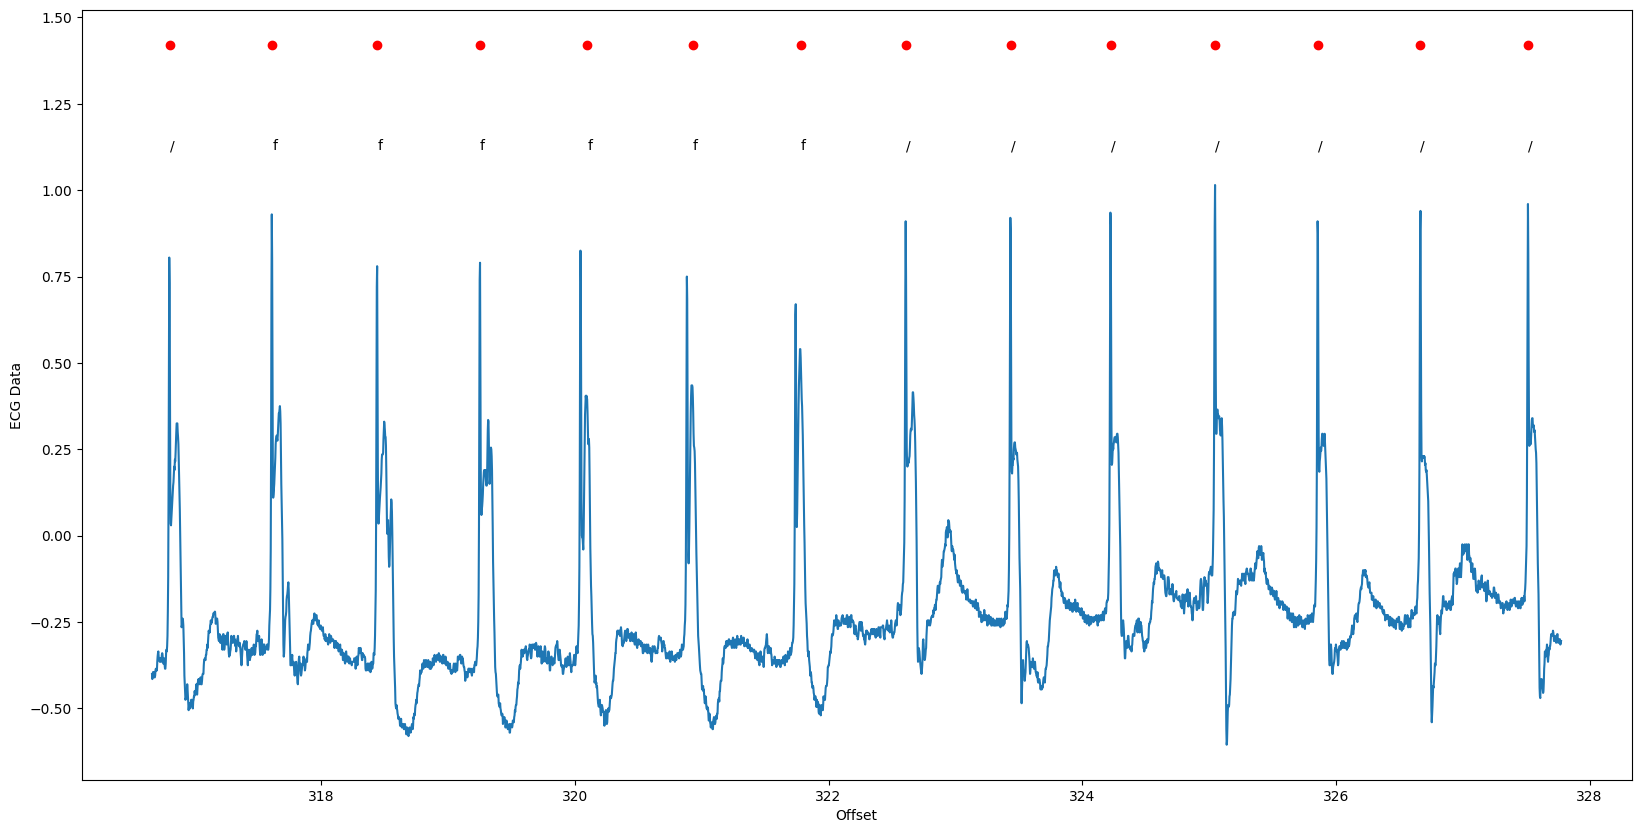

In [7]:
dbfiles = dm.get_records("../data/raw/mitdb")
print('Total files: ', len(dbfiles))

# Pick a file.
FILE = 2
datfile = dbfiles[FILE]
print('Loading file:', datfile)

# Specify the save path.
save_path = f"../reports/figures/{datfile.split('/')[-1].split('.')[0]}_ecg_plot.png"

times, ecg_data, annotimes, annotypes = load_ecg_file(datfile, CHANNEL, SAMPLE_START, SAMPLE_SIZE)
plot_ecg_data(times, ecg_data, annotimes, annotypes, save_path=save_path)